Instalations and imports for this script

In [1]:
pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import io
import pandas as pd
import numpy as np
import tensorflow as tf

from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from numpy import asarray
from keras.utils.vis_utils import plot_model
from google.colab import files
from keras import backend as K

Definition of parameters for the proposed model


In [3]:
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(10, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='relu'))
	model.compile(loss='mean_squared_error', optimizer='Adam', metrics=[percentage_difference])
	return model

Validation of the model

- yhat is a vector of predictions of the probabilities of occurrence of each emergent behavior (this value, betweeen zero and one, is compared to the real value presented in the emergent behavior dataframe (which is necessarily zero or one, as will be explained later in this script)

In [4]:
def evaluate_model(X, y):
  results = list()
  n_inputs, n_outputs = X.shape[1], y.shape[1]
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  i = 1
  for train_ix, test_ix in cv.split(X):
    print('Split number: ', i)
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    model = get_model(n_inputs, n_outputs)
    model.fit(X_train, y_train, verbose=0, epochs=100)
    yhat = model.predict(X_test)
    acc = percentage_difference(y_test, yhat)
    print('>Mean percentage difference to correct answer: %.2f %%' % acc)
    results.append(acc)
    i = i + 1
  return results

Definition of percentage difference. It was utilized this metric due to the possible values of the dataframe being between zero and one

In [5]:
def percentage_difference(y_true, y_pred):
  return K.mean(tf.convert_to_tensor(abs(y_pred - y_true) * 100))

Source file download for loading the dataframe utilized in this script

In [6]:
!wget https://anonymous.4open.science/r/mac_gyver_predictor-D307/working_dataset_for_deep_learning.csv

--2022-05-27 00:46:22--  https://anonymous.4open.science/r/mac_gyver_predictor-D307/working_dataset_for_deep_learning.csv
Resolving anonymous.4open.science (anonymous.4open.science)... 172.67.183.76, 104.21.18.195, 2606:4700:3035::ac43:b74c, ...
Connecting to anonymous.4open.science (anonymous.4open.science)|172.67.183.76|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /api/repo/mac_gyver_predictor-D307/file/working_dataset_for_deep_learning.csv [following]
--2022-05-27 00:46:22--  https://anonymous.4open.science/api/repo/mac_gyver_predictor-D307/file/working_dataset_for_deep_learning.csv
Reusing existing connection to anonymous.4open.science:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘working_dataset_for_deep_learning.csv.1’

working_dataset_for     [ <=>                ]   6.75K  --.-KB/s    in 0s      

2022-05-27 00:46:22 (50.7 MB/s) - ‘working_dataset_for_deep_learning.csv.1’ saved [6913]



In [7]:
working_deep_learning_base_dataset = pd.read_csv('/content/working_dataset_for_deep_learning.csv')

Original dataset. The column "Constituents" identifies the SoS represented by their constituents. The other columns are the possible emergent behaviors, where a value "zero" indicates the absence of that emergent behavior in that SoS and the value "one" represents the occurrence of that emergent behavior in that SoS.

In [8]:
working_deep_learning_base_dataset

,Constituents,load-generation balance,control the battery and enhance the operation of the system,decrease the power consumption from power utility by using available energy from the solar panels,supply power power to the electric load,supply power to homes even in the event of an electric grid outage,to ensure the comfort of its occupants by enhancing the automation to relief them from manual control of different services while increasing the energy savings,minimize the average vehicle waiting time in the network,minimize the local waiting time for vehicles,"north-to-south, red-to-green transition times",...,Different responses according to different demand/response schemes (price-based),decision about the best control design of the Smart Grid,optimizations of the decisions of the Smart Grid given the best control design,to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.,"to use as much as possible of the locally produced renewable energy and transact energy to decrease operational costs, optimizing its integration in smart grid advanced context.",system disruption responses and minimization of the overall costs of satisfying total demand from the system in these events,agents perform different functions based on their unique advantages relative to other agents postdisruption,"coordination mechanism, dynamic reorganization and coordination of the network under a disruption",Negotiation and collaboration for resource allocation and demand efficiency,Resolution of potencial conflicts
0,"['Diesel Generator Agent', 'Transfer Switch', ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"['Commercial Greenhouse Growers (CGGs)', 'Virt...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,"['Market Agent', 'Storage Agent', 'Optimizer A...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['Building Management System (BMS)', 'Diesel G...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['Group (Representative) Agent - collectives',...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"['Smart Grid CS', 'Virtual Power Plant (VPP) -...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"['Photovoltaic System', 'electric vehicles']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"['Battery storages', 'Electric Load', 'Photovo...",0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"['electric vehicles', 'Electric Appliances (li...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,['Electric Appliances (lights/refrigerators/fr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Separation of the original dataframe em two parts, one for the constituents, over which is applied the one-hot encoding algorithm (segregation of the constituents); the other dataframe regards the emergent behaviors

In [9]:
constituents = pd.DataFrame(working_deep_learning_base_dataset["Constituents"].str.split(',', expand=True).values)
constituents_one_hot_encoding = pd.get_dummies(constituents, prefix="Constituents")
emergent_behaviors = working_deep_learning_base_dataset.drop('Constituents', axis=1)

Presentation of the resulting dataframes and respective dimensions. Value "zero" represents the absence of a constituent or an emergent behavior (depending on the column) in that SoS. Value "one", in turn, indicates the occurrence of that constituent or emergent behavior (depending on the column) in that SoS.

In [10]:
constituents_one_hot_encoding

,Constituents_['Battery storages',Constituents_['Building Management System (BMS)',Constituents_['Commercial Greenhouse Growers (CGGs)',Constituents_['Diesel Generator Agent',Constituents_['Electric Appliances (lights/refrigerators/freezers/washers/dyers/water heaters/baseload)',Constituents_['Electric Load',Constituents_['Group (Representative) Agent - collectives',Constituents_['Heating/Ventilation and Air-Conditioning system (HVAC)',Constituents_['Market Agent',Constituents_['Photovoltaic System',...,Constituents_ 'provider of raw material'],Constituents_ 'Cooling System',Constituents_ 'Fire Detection CS',Constituents_ 'Transformer',Constituents_ 'Wind Energy system'],Constituents_ 'Power Distribution Unit (PDU)',Constituents_ 'Security Surveillance CS',Constituents_ 'Transmission line'],Constituents_ 'Emergency Management CS'],Constituents_ 'Wind Energy system']
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
constituents_one_hot_encoding.shape

(15, 68)

In [12]:
emergent_behaviors

,load-generation balance,control the battery and enhance the operation of the system,decrease the power consumption from power utility by using available energy from the solar panels,supply power power to the electric load,supply power to homes even in the event of an electric grid outage,to ensure the comfort of its occupants by enhancing the automation to relief them from manual control of different services while increasing the energy savings,minimize the average vehicle waiting time in the network,minimize the local waiting time for vehicles,"north-to-south, red-to-green transition times",balance between energy production and consumption,...,Different responses according to different demand/response schemes (price-based),decision about the best control design of the Smart Grid,optimizations of the decisions of the Smart Grid given the best control design,to proactively plan the DC operation as a system to be able to exploit its latent flexible energy to achieve a deeper and more efficient integration with the local Smart Grid.,"to use as much as possible of the locally produced renewable energy and transact energy to decrease operational costs, optimizing its integration in smart grid advanced context.",system disruption responses and minimization of the overall costs of satisfying total demand from the system in these events,agents perform different functions based on their unique advantages relative to other agents postdisruption,"coordination mechanism, dynamic reorganization and coordination of the network under a disruption",Negotiation and collaboration for resource allocation and demand efficiency,Resolution of potencial conflicts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
emergent_behaviors.shape

(15, 37)

Initiation of the processes for running the Multi-label classification algorithm

In [14]:
X, y = constituents_one_hot_encoding.values, emergent_behaviors.values

Here, it is applied the "percentage_difference" metric, due to this reason: as the possible values are between zero and one, we chose to measure, in percentage, how far the predicted value is from the correct answer, whether it is for the value zero or for the value one. Accuracy, then, will be 100 minus this value

In [15]:
results = evaluate_model(X, y)

print()
print('Mean percentage difference to correct answer (among splits): %.2f %% - Deviation: %.2f %%' % (mean(results), std(results)))
print()
print('Accuracy: %.2f %% - Deviation: %.2f %%' % (100 - mean(results), std(results)))

Split number:  1
>Mean percentage difference to correct answer: 11.39 %
Split number:  2
>Mean percentage difference to correct answer: 12.23 %
Split number:  3
>Mean percentage difference to correct answer: 9.85 %
Split number:  4
>Mean percentage difference to correct answer: 8.49 %
Split number:  5
>Mean percentage difference to correct answer: 6.60 %
Split number:  6
>Mean percentage difference to correct answer: 6.33 %
Split number:  7
>Mean percentage difference to correct answer: 14.95 %
Split number:  8
>Mean percentage difference to correct answer: 10.51 %
Split number:  9
>Mean percentage difference to correct answer: 4.19 %
Split number:  10
>Mean percentage difference to correct answer: 5.66 %
Split number:  11
>Mean percentage difference to correct answer: 15.71 %
Split number:  12
>Mean percentage difference to correct answer: 8.35 %
Split number:  13
>Mean percentage difference to correct answer: 8.67 %
Split number:  14
>Mean percentage difference to correct answer: 12.

Evaluation for a new SoS, which does not exist in the original dataframe. It will be composed from the following constituents:

In [16]:
print(constituents_one_hot_encoding.columns[18])
print(constituents_one_hot_encoding.columns[44])
print(constituents_one_hot_encoding.columns[60])

Constituents_ 'Electric Appliances (lights/refrigerators/freezers/washers/dyers/water heaters/baseload)'
Constituents_ 'one heating system'
Constituents_ 'Fire Detection CS'


This is equivalent to feeding the input of the algorithm with a vector of zeros, except for the indexes of these constituents:

In [17]:
new_SoS = np.zeros(68)
new_SoS[18] = 1
new_SoS[44] = 1
new_SoS[60] = 1

Execution of tests: Here is presented the probability of occurrence of each one of the possible emergent behaviors that exist in the original dataframe. One possible approach to adopt with these results is estabilishing a limiar percentage, beyond which the resulting probabilities would be considered as effective emergent behaviors (eg. probabilities > 0,9)

In [18]:
n_inputs, n_outputs = X.shape[1], y.shape[1]

model = get_model(n_inputs, n_outputs)

model.fit(X, y, verbose=0, epochs=100)
row = new_SoS
newX = asarray([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])

Predicted: [0.         0.         0.         0.         0.14144203 0.14138553
 0.01393564 0.03596917 0.         0.         0.         0.
 0.         0.         0.054718   0.         0.11373699 0.
 0.         0.         0.         0.         0.         0.00838198
 0.         0.13765511 0.02511211 0.         0.         0.
 0.         0.         0.00638045 0.         0.         0.
 0.        ]


Model summary:

In [19]:
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 10)                690       
                                                                 
 dense_61 (Dense)            (None, 37)                407       
                                                                 
Total params: 1,097
Trainable params: 1,097
Non-trainable params: 0
_________________________________________________________________
None


Model diagram:


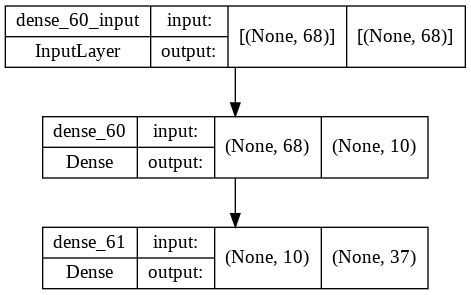

In [20]:
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

Bibliography:

https://machinelearningmastery.com/multi-label-classification-with-deep-learning/

https://hackernoon.com/7-effective-ways-to-deal-with-a-small-dataset-2gyl407s